In [1]:
import pandas as pd
from reload_recursive import reload_recursive
from loguru import logger
from pathlib import Path

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.agreement import mean_diff_plot


import mri_data
import monai_training

In [8]:
t1_analysis_dir = Path(r"/home/srs-9/Projects/ms_mri/analysis/choroid_pineal_pituitary_crosstrain_t1")
df_t1 = pd.read_csv(t1_analysis_dir / "dataframe.csv")
df_t1.set_index("subject_id")

rename_cols = {"auto_label": "t1_label",
               "choroid_vol_auto": "choroid_vol_t1",
               "pineal_vol_auto": "pineal_vol_t1",
               "pituitary_vol_auto": "pituitary_vol_t1",
               'choroid_dice': "choroid_dice_t1", 
               'pineal_dice': "pineal_dice_t1",
               'pituitary_dice': "pituitary_dice_t1"}
df_t1 = df_t1.rename(columns=rename_cols)

In [9]:
flair_t1_analysis_dir = Path(r"/home/srs-9/Projects/ms_mri/analysis/choroid_pineal_pituitary_crosstrain")
df_flair_t1 = pd.read_csv(flair_t1_analysis_dir / "dataframe.csv")
df_flair_t1.set_index("subject_id")

rename_cols = {"auto_label": "flair_t1_label",
               "choroid_vol_auto": "choroid_vol_flair_t1",
               "pineal_vol_auto": "pineal_vol_flair_t1",
               "pituitary_vol_auto": "pituitary_vol_flair_t1",
               'choroid_dice': "choroid_dice_flair_t1", 
               'pineal_dice': "pineal_dice_flair_t1",
               'pituitary_dice': "pituitary_dice_flair_t1"}
df_flair_t1 = df_flair_t1.rename(columns=rename_cols)

In [10]:
df = df_t1.join(df_flair_t1.loc[:, rename_cols.values()])

In [25]:
data = df.loc[:, ["choroid_dice_t1", "choroid_dice_flair_t1"]].dropna()
statistic, p_val = stats.wilcoxon(data['choroid_dice_t1'], data['choroid_dice_flair_t1'])
print(p_val)
print(data['choroid_dice_t1'].mean())
print(data['choroid_dice_flair_t1'].mean())

2.6737125153886154e-06
0.698428828299513
0.7289667982103709


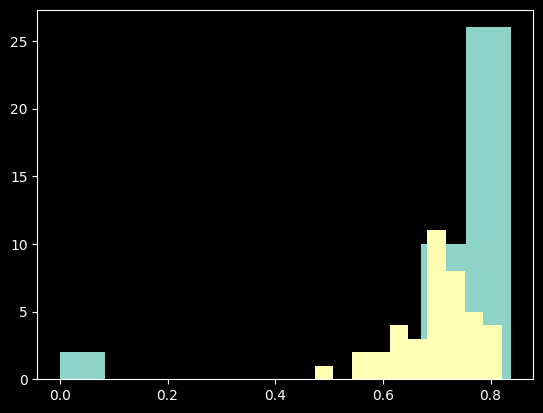

In [26]:
plt.hist(data['choroid_dice_flair_t1'])
plt.hist(data['choroid_dice_t1'])
plt.show()